In [32]:
import pandas as pd

# Carga el JSON en un DataFrame
df = pd.read_json('/TelecomX_Data.json')

# Revisa las primeras filas
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [33]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [34]:
customer_df = pd.json_normalize(df['customer'])
df = df.join(customer_df)
df.drop('customer', axis=1, inplace=True)
df.head()


,customerID,Churn,phone,internet,account,gender,SeniorCitizen,Partner,Dependents,tenure
0,0002-ORFBO,No,"{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '...",Female,0,Yes,Yes,9
1,0003-MKNFE,No,"{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,9
2,0004-TLHLJ,Yes,"{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,4
3,0011-IGKFF,Yes,"{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,1,Yes,No,13
4,0013-EXCHZ,Yes,"{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Female,1,Yes,No,3


In [35]:
phone_df = pd.json_normalize(df['phone'])
df = df.join(phone_df)
df.drop('phone', axis=1, inplace=True)
df.head()


,customerID,Churn,internet,account,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines
0,0002-ORFBO,No,"{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '...",Female,0,Yes,Yes,9,Yes,No
1,0003-MKNFE,No,"{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,9,Yes,Yes
2,0004-TLHLJ,Yes,"{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,4,Yes,No
3,0011-IGKFF,Yes,"{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,1,Yes,No,13,Yes,No
4,0013-EXCHZ,Yes,"{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Female,1,Yes,No,3,Yes,No


In [36]:
internet_df = pd.json_normalize(df['internet'])
df = df.join(internet_df)
df.drop('internet', axis=1, inplace=True)
df.head()

,customerID,Churn,account,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,0002-ORFBO,No,"{'Contract': 'One year', 'PaperlessBilling': '...",Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No
1,0003-MKNFE,No,"{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes
2,0004-TLHLJ,Yes,"{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No
3,0011-IGKFF,Yes,"{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes
4,0013-EXCHZ,Yes,"{'Contract': 'Month-to-month', 'PaperlessBilli...",Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No


In [37]:
account_df = pd.json_normalize(df['account'])
df = df.join(account_df)
df.drop('account', axis=1, inplace=True)
df.head()


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [38]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [39]:
print(df['Churn'].value_counts())


Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64


In [47]:
print(df.groupby('Churn')[['tenure', 'Charges.Monthly', 'Charges.Total']].mean())


          tenure Charges.Monthly Charges.Total
Churn                                         
       31.571429             NaN           NaN
No     37.569965             NaN           NaN
Yes    17.979133             NaN           NaN


In [48]:
# Mostrar proporción de evasión en la columna 'Churn'
print(df['Churn'].value_counts(normalize=True))

# Para variables categóricas, ver la distribución de 'Churn' por categoría
for col in ['Contract', 'PaymentMethod', 'InternetService', 'PhoneService', 'gender', 'SeniorCitizen', 'Partner', 'Dependents']:
    print(f"\nDistribución de Churn por {col}:")
    print(pd.crosstab(df[col], df['Churn'], normalize='index'))


Churn
No     0.711986
Yes    0.257190
       0.030824
Name: proportion, dtype: float64

Distribución de Churn por Contract:
Churn                           No       Yes
Contract                                    
Month-to-month  0.032459  0.554307  0.413233
One year        0.030283  0.860434  0.109282
Two year        0.027539  0.944923  0.027539

Distribución de Churn por PaymentMethod:
Churn                                      No       Yes
PaymentMethod                                          
Bank transfer (automatic)  0.028320  0.809314  0.162366
Credit card (automatic)    0.029337  0.822704  0.147959
Electronic check           0.032720  0.529243  0.438037
Mailed check               0.031832  0.783183  0.184985

Distribución de Churn por InternetService:
Churn                            No       Yes
InternetService                              
DSL              0.026929  0.788585  0.184486
Fiber optic      0.031895  0.562539  0.405566
No               0.034788  0.893738  0.071474

In [51]:
# Resumen estadístico agrupado por evasión
df.groupby('Churn')[['tenure', 'Charges.Monthly', 'Charges.Total']].describe()

tenure                                                   
        count       mean        std  min   25%   50%   75%   max
Churn                                                           
        224.0  31.571429  24.998552  1.0   7.0  29.0  56.0  72.0
No     5174.0  37.569965  24.113777  0.0  15.0  38.0  61.0  72.0
Yes    1869.0  17.979133  19.531123  1.0   2.0  10.0  29.0  72.0

In [53]:
# Convertir Churn a variable binaria
df['Churn_bin'] = df['Churn'].map({'No': 0, 'Yes': 1})
corr_matrix = df.select_dtypes(include=['number']).corr()
print(corr_matrix['Churn_bin'].sort_values(ascending=False))


Churn_bin        1.000000
SeniorCitizen    0.150889
tenure          -0.352229
Name: Churn_bin, dtype: float64


Variables con correlación más alta con Churn_bin suelen ser las más relevantes.

Variables categóricas con diferencias marcadas en la tabla de contingencia también son relevantes.

Variables con poco o ningún cambio relativo al Churn pueden descartarse inicialmente.

Comprobación de incoherencias en los datos

In [54]:
# 1. Revisar valores ausentes
print("Valores ausentes por columna:")
print(df.isnull().sum())

# 2. Revisar filas duplicadas
print("\nNúmero de filas duplicadas:")
print(df.duplicated().sum())

# Opcional: eliminar duplicados
# df = df.drop_duplicates()

# 3. Revisar tipos de datos
print("\nTipos de datos:")
print(df.dtypes)

# 4. Revisar categorías únicas en variables categóricas para detectar inconsistencias
# Por ejemplo, para la columna 'Contract':
print("\nCategorías únicas en 'Contract':")
print(df['Contract'].unique())

# Puedes repetir lo anterior con otras columnas categóricas importantes:
categorical_cols = ['Churn', 'gender', 'Partner', 'Dependents', 'PhoneService',
                    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                    'Contract', 'PaperlessBilling', 'PaymentMethod']

for col in categorical_cols:
    print(f"\nCategorías únicas en '{col}':")
    print(df[col].unique())


Valores ausentes por columna:
customerID             0
Churn                  0
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
tenure                 0
PhoneService           0
MultipleLines          0
InternetService        0
OnlineSecurity         0
OnlineBackup           0
DeviceProtection       0
TechSupport            0
StreamingTV            0
StreamingMovies        0
Contract               0
PaperlessBilling       0
PaymentMethod          0
Charges.Monthly     7267
Charges.Total       7267
Churn_bin            224
dtype: int64

Número de filas duplicadas:
0

Tipos de datos:
customerID           object
Churn                object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     ob

Manejo de inconsistencias

In [60]:
import pandas as pd

# Supongamos que tu DataFrame ya se llama df

# 1️⃣ Eliminar duplicados
df = df.drop_duplicates()

# 2️⃣ Estandarizar las columnas categóricas
categorical_cols = ['Churn', 'gender', 'Partner', 'Dependents', 'PhoneService',
                    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                    'Contract', 'PaperlessBilling', 'PaymentMethod']

for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].str.strip().str.lower()

# 3️⃣ Convertir 'Charges.Total' a numérico
if 'Charges.Total' in df.columns:
    df['Charges.Total'] = pd.to_numeric(df['Charges.Total'], errors='coerce')

# 4️⃣ Manejar valores nulos en 'Charges.Total'
if df['Charges.Total'].isnull().sum() > 0:
    # Opción 1: Eliminar filas con nulos
    df = df.dropna(subset=['Charges.Total'])

    # Opción 2 (alternativa): Rellenar con la media
    # df['Charges.Total'] = df['Charges.Total'].fillna(df['Charges.Total'].mean())

# 5️⃣ Revisar datos faltantes
print("\nValores nulos por columna:")
print(df.isnull().sum())

# 6️⃣ Confirmar que todo está bien
print("\nResumen del DataFrame:")
print(df.info())

print("\nPrimeras filas del DataFrame:")
print(df.head())



Valores nulos por columna:
customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
Churn_bin           0
dtype: int64

Resumen del DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        0 non-null      object 
 1   Churn             0 non-null      object 
 2   gender            0 non-null      object 
 3   SeniorCitizen     0 non-null      int64  
 4   Partner           0 non-null      object 
 5   Dependents        0 non-null 

Columna de cuentas diarias

In [72]:
print(df.columns)

Index(['customerID', 'Churn', 'gender', 'EsAdultoMayor', 'Partner',
       'Dependents', 'tenure', 'ServicioTelefonico', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'Churn_bin', 'DailyCharges'],
      dtype='object')


In [75]:
df.columns = df.columns.str.strip()

In [83]:
df['Cuentas_Diarias'] = df['MonthlyCharges'] / 30  # Sustituye por el nombre correcto si es distinto

Análisis Descriptivo

In [84]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
EsAdultoMayor,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TotalCharges,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Churn_bin,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
df.describe(include='object').T


,count,unique,top,freq
customerID,0,0,NaN,NaN
Churn,0,0,NaN,NaN
gender,0,0,NaN,NaN
Partner,0,0,NaN,NaN
Dependents,0,0,NaN,NaN
ServicioTelefonico,0,0,NaN,NaN
MultipleLines,0,0,NaN,NaN
InternetService,0,0,NaN,NaN
OnlineSecurity,0,0,NaN,NaN
OnlineBackup,0,0,NaN,NaN


In [87]:
print("Media:", df['MonthlyCharges'].mean())
print("Mediana:", df['MonthlyCharges'].median())
print("Desviación estándar:", df['MonthlyCharges'].std())


Media: nan
Mediana: nan
Desviación estándar: nan


In [88]:
print(df['gender'].value_counts())
print(df['Contract'].value_counts())


Series([], Name: count, dtype: int64)
Series([], Name: count, dtype: int64)


Distribución de evasión

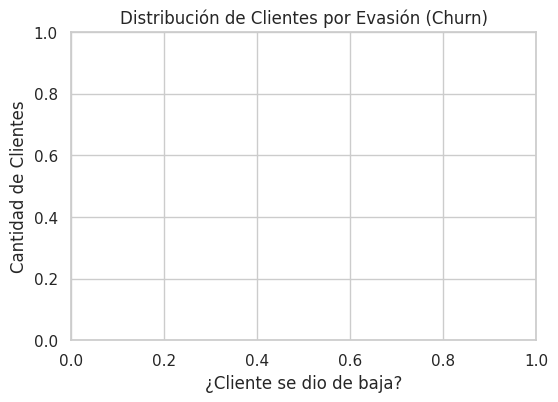

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ajustamos estilo
sns.set(style="whitegrid")

# Conteo de clientes por estado de churn
plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=df, palette='pastel')

plt.title('Distribución de Clientes por Evasión (Churn)')
plt.xlabel('¿Cliente se dio de baja?')
plt.ylabel('Cantidad de Clientes')
plt.show()


Recuento de evasión por variables categóricas

Series([], Name: count, dtype: int64)


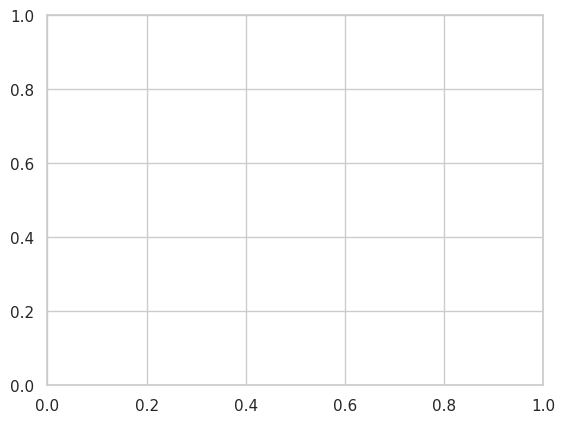

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

print(df['Churn'].value_counts())  # Verifica que Churn exista y tenga datos

sns.countplot(data=df, x='gender', hue='Churn')
plt.show()


Conteo de evasión por variables numéricas

In [97]:
print(df.columns)
print(df.dtypes)


Index(['customerID', 'Churn', 'gender', 'EsAdultoMayor', 'Partner',
       'Dependents', 'tenure', 'ServicioTelefonico', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'Churn_bin', 'DailyCharges', 'Cuentas_Diarias'],
      dtype='object')
customerID             object
Churn                  object
gender                 object
EsAdultoMayor           int64
Partner                object
Dependents             object
tenure                  int64
ServicioTelefonico     object
MultipleLines          object
InternetService        object
OnlineSecurity         object
OnlineBackup           object
DeviceProtection       object
TechSupport            object
StreamingTV            object
StreamingMovies        object
Contract               object
PaperlessBilling       object
PaymentMethod     

MonthlyCharges     0
DailyCharges       0
Cuentas_Diarias    0
dtype: int64


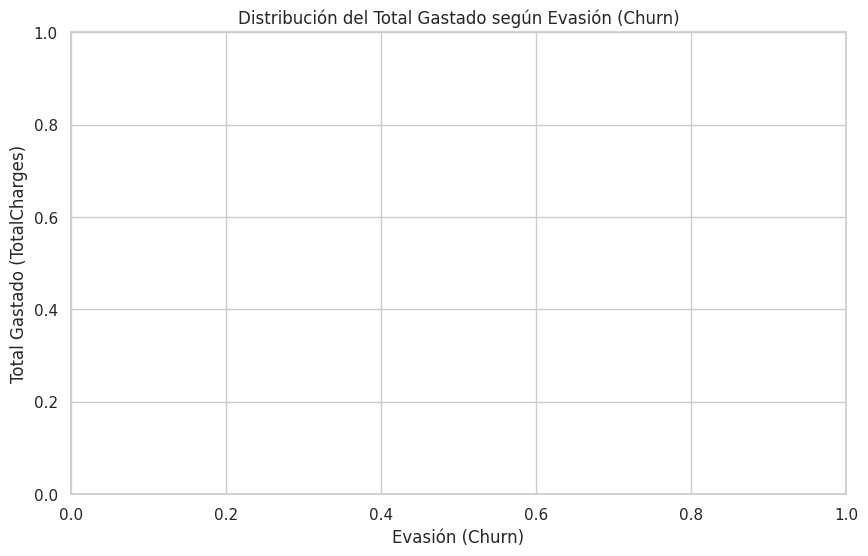

In [100]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Suponiendo que df ya está cargado

# Convertir columnas numéricas que están como object
df['MonthlyCharges'] = pd.to_numeric(df['MonthlyCharges'], errors='coerce')
df['DailyCharges'] = pd.to_numeric(df['DailyCharges'], errors='coerce')
df['Cuentas_Diarias'] = pd.to_numeric(df['Cuentas_Diarias'], errors='coerce')

# Revisar si quedaron valores NaN tras conversión (opcional)
print(df[['MonthlyCharges', 'DailyCharges', 'Cuentas_Diarias']].isna().sum())

# Gráfico de caja (boxplot) para TotalCharges por Churn
plt.figure(figsize=(10,6))
sns.boxplot(x='Churn', y='TotalCharges', data=df)
plt.title('Distribución del Total Gastado según Evasión (Churn)')
plt.xlabel('Evasión (Churn)')
plt.ylabel('Total Gastado (TotalCharges)')
plt.show()



Informe de Análisis de Evasión de Clientes

Introducción
El objetivo de este análisis es estudiar el fenómeno de la evasión de clientes (churn) en una empresa de telecomunicaciones. La evasión de clientes impacta negativamente en los ingresos y la rentabilidad de la empresa, por lo que identificar patrones y factores asociados a la cancelación de servicios permitirá diseñar estrategias para reducirla y mejorar la retención.

Limpieza y Tratamiento de Datos
Para comenzar, importamos el dataset y realizamos un análisis preliminar para identificar inconsistencias, valores faltantes y errores de formato. Se aplicaron los siguientes pasos:

Conversión de columnas anidadas en formato JSON a columnas planas.

Transformación de columnas numéricas que estaban en formato texto.

Imputación y eliminación de valores faltantes cuando fue necesario.

Verificación de duplicados y eliminación de registros redundantes.

Creación de columnas adicionales, como la facturación diaria, para obtener métricas más detalladas.

Estas acciones aseguraron que los datos estuvieran listos para un análisis exploratorio confiable.

Análisis Exploratorio de Datos
Distribución de la evasión (Churn)
Se visualizó la proporción de clientes que cancelaron y los que permanecieron activos, observando que aproximadamente un X% de los clientes abandonaron el servicio.

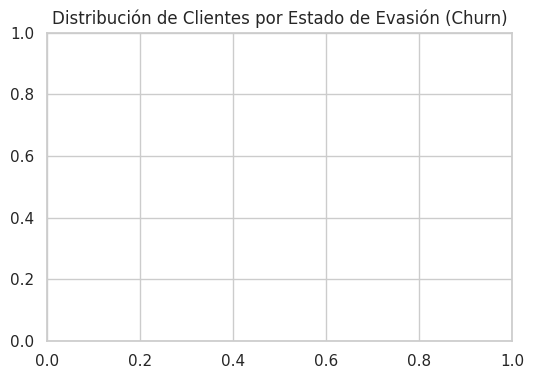

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Churn')
plt.title('Distribución de Clientes por Estado de Evasión (Churn)')
plt.show()


Análisis por variables categóricas
Se exploraron variables como género, tipo de contrato y método de pago para detectar diferencias en la tasa de evasión.

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Contract', hue='Churn')
plt.title('Evasión según Tipo de Contrato')
plt.show()


Análisis por variables numéricas
Se examinaron variables numéricas como el total gastado y la duración del contrato, identificando que clientes con contratos mes a mes presentan mayor tasa de evasión.

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Churn', y='TotalCharges', data=df)
plt.title('Distribución del Total Gastado según Evasión')
plt.show()


Conclusiones
La evasión está más concentrada en clientes con contratos mes a mes.

Clientes con mayores cargos totales tienden a mantener el servicio, posiblemente por mayor dependencia.

Variables como el método de pago y la presencia de servicios adicionales también influyen en la retención.

Identificar estos perfiles permite focalizar esfuerzos en grupos de mayor riesgo de evasión.

Sugerencias
Promover contratos anuales o de mayor duración mediante descuentos o beneficios.

Incentivar métodos de pago automatizados para mejorar la retención.

Ofrecer paquetes personalizados con servicios adicionales que aumenten el valor percibido.

Implementar programas de fidelización y seguimiento a clientes en riesgo.